In [50]:
import pandas as pd
import numpy as np
import sqlite3
from datetime import datetime
import time
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import floor, ceil
from pylab import rcParams
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

%matplotlib inline

/Users/CraigFan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# sns.set(style='ticks', palette='Spectral', font_scale=1.5)

# material_palette = ["#4CAF50", "#2196F3", "#9E9E9E", "#FF9800", "#607D8B", "#9C27B0"]
# sns.set_palette(material_palette)
# rcParams['figure.figsize'] = 16, 8

# plt.xkcd();
# random_state = 42
# np.random.seed(random_state)
# tf.set_random_seed(random_state)

In [80]:
engine = sqlite3.connect('DB')

train_x = pd.read_sql("""
SELECT Store, Dept, Date, IsHoliday
FROM train_x
""", engine)

train_y = pd.read_sql("""
SELECT *
FROM train_y
""", engine)

test = pd.read_sql("""
SELECT *
FROM test
""", engine)

baseTrain_x = pd.read_sql("""
SELECT *
FROM baseTrain_x
""", engine)

baseTrain_y = pd.read_sql("""
SELECT *
FROM baseTrain_y
""", engine)

train_size = 0.8
train_cnt = floor(train_x.shape[0] * train_size)
x_train = train_x.iloc[0: train_cnt].values
y_train = train_y.iloc[0: train_cnt].values
x_test = train_x.iloc[train_cnt:].values
y_test = train_y.iloc[train_cnt:].values

In [82]:
print(len(train_y))
print(len(y_test))
print(train_cnt)

97056
19412
77644


In [83]:
def multilayer_perceptron(x, weights, biases, keep_prob):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

In [84]:
n_hidden_1 = 38
n_input = train_x.shape[1]#15 for 15 columns(the features)
n_classes = train_y.shape[1]#1 for 1 column(the labels)

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

keep_prob = tf.placeholder('float')

In [85]:
training_epochs = 50
display_step = 10
batch_size = 32

x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_classes])

In [86]:
predictions = multilayer_perceptron(x, weights, biases, keep_prob)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

In [99]:
def baseline_model(lossFunc):
    model = Sequential()
    model.add(Dense(5, input_dim = 4, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(3, activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal'))
    
    model.compile(loss = lossFunc, optimizer = 'adam', metrics = ['accuracy'])
    return model

In [88]:
"""
input_dim is number of columns
model.add(Dense(16, input_dim = 16, kernel_initializer = 'normal', activation = 'relu'))
That means it the layer has 16 nodes and expects 16 features(input variables)

model.add(Dense(8, activation='relu'))
This layer has 8 neurons

model.add(Dense(1, activation='sigmoid'))
This layer 1 neuron which you apply the sigmoid function to get an output

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
To compile the model

model.fit(X, Y, epochs=150, batch_size=10)
#Fit model

scores = model.evaluate(test_X, test_Y)
#Test model

"""

"\ninput_dim is number of columns\nmodel.add(Dense(16, input_dim = 16, kernel_initializer = 'normal', activation = 'relu'))\nThat means it the layer has 16 nodes and expects 16 features(input variables)\n\nmodel.add(Dense(8, activation='relu'))\nThis layer has 8 neurons\n\nmodel.add(Dense(1, activation='sigmoid'))\nThis layer 1 neuron which you apply the sigmoid function to get an output\n\nmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])\nTo compile the model\n\nmodel.fit(X, Y, epochs=150, batch_size=10)\n#Fit model\n\nscores = model.evaluate(test_X, test_Y)\n#Test model\n\n"

In [89]:
# seed = 7
# np.random.seed(seed)
# estimator = KerasRegressor(build_fn=baseline_model, epochs=20, batch_size=250, verbose=0)
# kfold = KFold(n_splits = 10, random_state = seed)
# results = cross_val_score(estimator, x_train, y_train, cv=kfold)
# print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

theModel = baseline_model('mean_squared_error')
trainedModel = theModel.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50, batch_size = 300)

ValueError: Error when checking input: expected dense_10_input to have shape (17,) but got array with shape (4,)

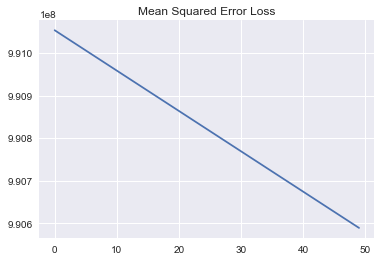

In [90]:
#MSE loss vals over epochs
lossVals = trainedModel.history['loss']
epochList = [x for x in range(len(history.history['loss']))]
plt.title('Mean Squared Error Loss')
plt.plot(epochList, lossVals)
plt.show()


[-9481.924269795418, -9477.99082994461, -9484.197619915009, -9480.743908047676, -9482.753490328789, -9481.075266599655, -9483.800319433212, -9490.409355521202, -9477.69079387188, -9481.693472743034, -9474.050795912743, -9487.33810722828, -9470.407500982285, -9476.223584532738, -9483.539848566055, -9481.93745815754, -9478.03534078598, -9472.842408895493, -9493.42455303669, -9475.064654111862, -9481.59620833397, -9476.467569947243, -9484.974086880684, -9485.821441411972, -9471.584565401077, -9475.989490509033, -9480.78677046299, -9476.790685653687, -9481.106589078903, -9479.214053869247, -9489.646076917648, -9472.659420013428, -9485.11915922165, -9472.171449184418, -9474.335994958878, -9471.846684932709, -9488.096440196037, -9469.96898663044, -9488.69980931282, -9466.39822781086, -9483.243109583855, -9468.48034620285, -9484.369069099426, -9487.713976621628, -9475.52624797821, -9469.324403762817]


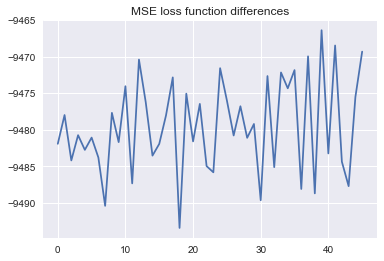

In [91]:
#MSE loss value difference in each step
lossDifferences = []
temp = lossVals[2:]
for i in range(len(lossVals)):
    lossDifferences.append(lossVals[i] - lossVals[i - 1])
x = 2
lossDifferences = []
while(x < len(temp)):
    lossDifferences.append(temp[x] - temp[x - 1])
    x += 1
print(lossDifferences)
epochList = [x for x in range(len(lossDifferences))]
plt.title('MSE loss function differences')
plt.plot(epochList, lossDifferences)
plt.show()

In [92]:
#theModel.predict(test)

In [93]:
trainingData = train_x.values
labelsData = train_y.values
testData = test.values
X = torch.tensor(trainingData)
y = torch.tensor(labelsData)

In [94]:
class Neural_Network(nn.Module):
    def __init__(self, ):
        super(Neural_Network, self).__init__()
        # parameters
        # TODO: parameters can be parameterized instead of declaring them here
        self.inputSize = 17
        self.outputSize = 1
        self.hiddenSize = 17
        
        # weights
        self.W1 = torch.randn(self.inputSize, self.hiddenSize) # 3 X 2 tensor
        self.W2 = torch.randn(self.hiddenSize, self.outputSize) # 3 X 1 tensor
        
    def forward(self, X):
        self.z = torch.matmul(X, self.W1) # 3 X 3 ".dot" does not broadcast in PyTorch
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = torch.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3) # final activation function
        return o
        
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))
    
    def sigmoidPrime(self, s):
        # derivative of sigmoid
        return s * (1 - s)
    
    def backward(self, X, y, o):
        self.o_error = y - o # error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # derivative of sig to error
        self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
        self.W1 += torch.matmul(torch.t(X), self.z2_delta)
        self.W2 += torch.matmul(torch.t(self.z2), self.o_delta)
        
    def train(self, X, y):
        # forward + backward pass for training
        o = self.forward(X)
        self.backward(X, y, o)
        
    def saveWeights(self, model):
        # we will use the PyTorch internal storage functions
        torch.save(model, "NN")
        # you can reload model with all the weights and so forth with:
        # torch.load("NN")
        
    def predict(self):
        print ("Predicted data based on trained weights: ")
        print ("Input (scaled): \n" + str(xPredicted))
        print ("Output: \n" + str(self.forward(xPredicted)))

In [95]:
baseTrain_x

,Store,Dept,Date,IsHoliday
0,1,1,12653.568,0
1,1,1,12659.616,1
2,1,1,12665.664,0
3,1,1,12671.712,0
4,1,1,12677.760,0
5,1,1,12683.808,0
6,1,1,12689.820,0
7,1,1,12695.868,0
8,1,1,12701.916,0
9,1,1,12707.964,0


In [96]:
x_test.shape

(19412, 4)

In [101]:
#SKLearn RandomForest

regr = RandomForestRegressor()
regr.fit(baseTrain_x, baseTrain_y)


/Users/CraigFan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[31332.427 30028.652 33384.622 ...   489.38    499.808   981.763]


In [111]:
print(regr.score(x_test, y_test))

0.9893509390984919


In [138]:
pureTest = pd.read_csv('./test.csv')

In [141]:
def createId(row):
    return str(row['Store']) + '_' + str(row['Dept']) + '_' + str(row['Date'])
pureTest['Id'] = pureTest.apply(lambda row: createId(row), axis = 1)
pureTest

,Store,Dept,Date,IsHoliday,Id
0,1,1,2012-11-02,False,1_1_2012-11-02
1,1,1,2012-11-09,False,1_1_2012-11-09
2,1,1,2012-11-16,False,1_1_2012-11-16
3,1,1,2012-11-23,True,1_1_2012-11-23
4,1,1,2012-11-30,False,1_1_2012-11-30
5,1,1,2012-12-07,False,1_1_2012-12-07
6,1,1,2012-12-14,False,1_1_2012-12-14
7,1,1,2012-12-21,False,1_1_2012-12-21
8,1,1,2012-12-28,True,1_1_2012-12-28
9,1,1,2013-01-04,False,1_1_2013-01-04


In [151]:
predictions = regr.predict(test)
length = len(predictions)
index = []
for i in range(length):
    index.append(i + 1)

predictionToCSV = np.asarray(predictions)
indexToCSV = np.asarray(index)

combined = []
for i in range(length):
    combined.append([pureTest['Id'].iloc[i], predictionToCSV[i]])
#np.savetxt('predictions.csv', combined, delimiter = ",", header = 'Id, Weekly Sales')

In [173]:
import csv
combined = np.asarray(combined)
np.savetxt('predictions.csv', combined, delimiter = ",", header = 'Id, Weekly_Sales', fmt = '%s')